# This notebook demonstrates how to download, process and plot points for the F1 Constructors Championship

# TeamsExtractor is a class which inherits from the DataExtractor class

In [2]:
from F1Archive.data.constructors_champ import TeamsExtractor

## 'PTS' - team points for season
## '% of total' - team percentage of all points awarded
## '% of max' - percentage of maximum points team could have scored

In [3]:
CS = TeamsExtractor()
CS.champ_standings([2012])
standings = CS.champ_tables['2012']
standings

,Team,PTS,% of total,% of max
Pos,,,,
1,Red Bull Racing Renault,460,22.77,53.49
2,Ferrari,400,19.80,46.51
3,McLaren Mercedes,378,18.71,43.95
4,Lotus Renault,303,15.00,35.23
5,Mercedes,142,7.03,16.51
6,Sauber Ferrari,126,6.24,14.65
7,Force India Mercedes,109,5.40,12.67
8,Williams Renault,76,3.76,8.84
9,STR Ferrari,26,1.29,3.02


# We can plot histograms of these results for a visual representation - First we will plot the basic constructors points with the plot_constructors function

In [4]:
from F1Archive.visualization.viz import plot_constructors

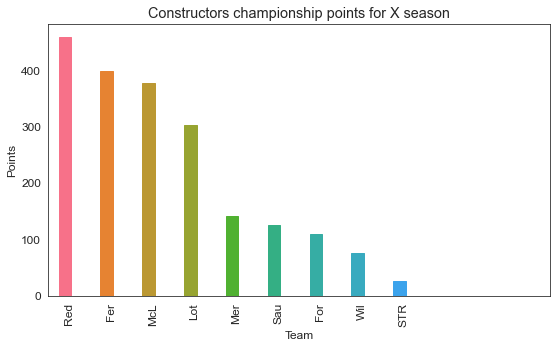

In [5]:
plot_constructors(standings);

# plot_per_max and plot_per_total functions are used to plot are used to plot histograms of the points scores relative to maximum and total points

In [6]:
from F1Archive.visualization.viz import plot_per_max, plot_per_total

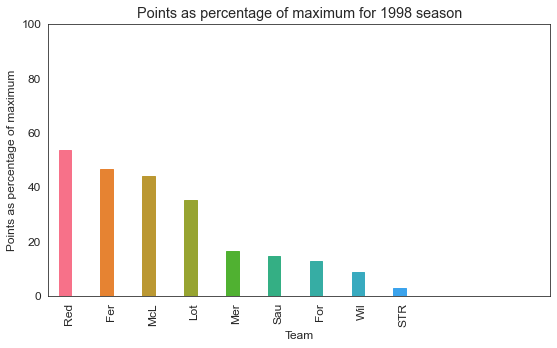

In [7]:
plot_per_max(standings, year='1998');

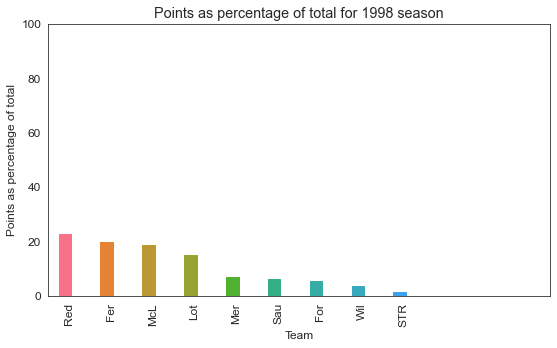

In [8]:
plot_per_total(standings, year='1998');

# The TeamsExtractor class can also be used extract results for multiple seasons for comparison - you can see multiple dataframes stored in a list 

In [17]:
TE = TeamsExtractor()
TE.champ_standings(['2016','2017','2018','2019', '2020'])
tables = TE.champ_tables
tables

{'2016':                           Team  PTS  % of total  % of max
 Pos                                                      
 1                     Mercedes  765       36.07     84.72
 2    Red Bull Racing TAG Heuer  468       22.07     51.83
 3                      Ferrari  398       18.76     44.08
 4         Force India Mercedes  173        8.16     19.16
 5            Williams Mercedes  138        6.51     15.28
 6                McLaren Honda   76        3.58      8.42
 7           Toro Rosso Ferrari   63        2.97      6.98
 8                 Haas Ferrari   29        1.37      3.21
 9                      Renault    8        0.38      0.89
 10              Sauber Ferrari    2        0.09      0.22
 11                MRT Mercedes    1        0.05      0.11,
 '2017':                           Team  PTS  % of total  % of max
 Pos                                                      
 1                     Mercedes  668       33.07     77.67
 2                      Ferrari  522   

# Use the get_seasons_df method to list totals across several seasons in a single dataframe

## Within this method, another method (generic_team_names) is used to convert different team names in different seasons into a single name e.g. Red Bull Racing Tag Heuer to Red Bull

## At present the method only really works for 2016-2020

In [18]:
TE.get_seasons_df(metric='% of total')
TE.seasons_df

,2016,2017,2018,2019,2020
Team,,,,,
Mercedes,36.07,33.07,31.77,34.53,33.33
Red Bull,22.07,18.22,20.32,19.49,18.56
Ferrari,18.76,25.84,27.69,23.55,7.62
Force India/RP,8.16,9.26,2.52,3.41,11.34
Williams,6.51,4.11,0.34,0.05,0.00
McLaren,3.58,1.49,3.01,6.78,11.75
Toro Rosso,2.97,2.62,1.60,3.97,6.22
Haas,1.37,2.33,4.51,1.31,0.17
Renault,0.38,2.82,5.92,4.25,10.53


# Trends can be plotted but first we must stack the results in the dataframes

In [19]:
from F1Archive.visualization.viz_utils import stack_constructor_trends
stacked_filled_df = stack_constructor_trends(TE.seasons_df)

stacked_filled_df

Empty DataFrame
Columns: [Team, Points, Year]
Index: []


,Points,Team,Year
0,36.07,Mercedes,2016
1,22.07,Red Bull,2016
2,18.76,Ferrari,2016
3,8.16,Force India/RP,2016
4,6.51,Williams,2016
5,3.58,McLaren,2016
6,2.97,Toro Rosso,2016
7,1.37,Haas,2016
8,0.38,Renault,2016
9,0.09,Sauber/Alfa,2016


# plot_constructors_trend is used to visualize how teams are performing over several years

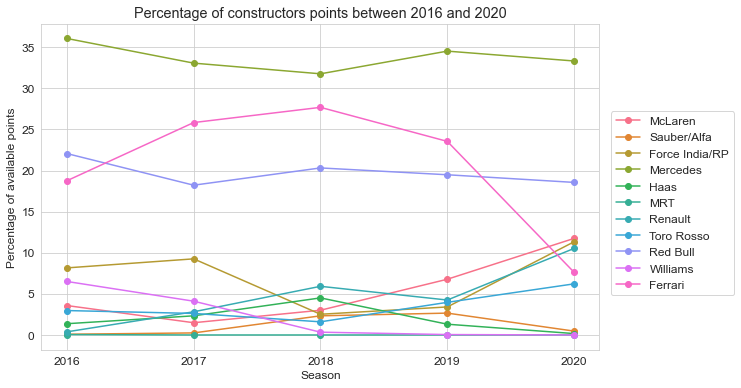

<Figure size 432x288 with 0 Axes>

In [20]:
from F1Archive.visualization.viz import plot_constructors_trend

plot_constructors_trend(stacked_filled_df);